In [89]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('dark_background')

In [90]:
df = pd.read_csv('bank-full.csv', delimiter=';')

### Baseline statistics and info

In [91]:
*df.shape,\
df.columns

(45211,
 17,
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'y'],
       dtype='object'))

In [92]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [93]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [94]:
df.quantile([.1, .3, .5, .7])

,age,balance,day,duration,campaign,pdays,previous
0.1,29.0,0.0,5.0,58.0,1.0,-1.0,0.0
0.3,34.0,131.0,10.0,117.0,1.0,-1.0,0.0
0.5,39.0,448.0,16.0,180.0,2.0,-1.0,0.0
0.7,46.0,1126.0,20.0,280.0,3.0,-1.0,0.0


#### Checking for NaN/duplicate values

In [95]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [96]:
df.duplicated().sum()

0

In [97]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [98]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [99]:
categorical_var_names = list(set(df.columns) - set(df.select_dtypes(include=np.number).columns))
categorical_var_names

['job',
 'contact',
 'housing',
 'y',
 'education',
 'default',
 'month',
 'marital',
 'poutcome',
 'loan']

In [100]:
categorical_vars = { var_name : set(df.get(var_name).unique()) for var_name in categorical_var_names }
categorical_vars

{'job': {'admin.',
  'blue-collar',
  'entrepreneur',
  'housemaid',
  'management',
  'retired',
  'self-employed',
  'services',
  'student',
  'technician',
  'unemployed',
  'unknown'},
 'contact': {'cellular', 'telephone', 'unknown'},
 'housing': {'no', 'yes'},
 'y': {'no', 'yes'},
 'education': {'primary', 'secondary', 'tertiary', 'unknown'},
 'default': {'no', 'yes'},
 'month': {'apr',
  'aug',
  'dec',
  'feb',
  'jan',
  'jul',
  'jun',
  'mar',
  'may',
  'nov',
  'oct',
  'sep'},
 'marital': {'divorced', 'married', 'single'},
 'poutcome': {'failure', 'other', 'success', 'unknown'},
 'loan': {'no', 'yes'}}

##### There are no NaN values, but there are 'unknown'/'other'

In [101]:
vars_with_unknown = [ var for var in categorical_vars if 'unknown' in categorical_vars[var] ]
vars_with_unknown

['job', 'contact', 'education', 'poutcome']

In [102]:
for var in vars_with_unknown:
    print(f'{var} -> unknown: {df.loc[df[var] == "unknown"].shape[0] / df.shape[0] * 100}%')

print(f'poutcome -> other: {df.loc[df.poutcome == "other"].shape[0] / df.shape[0] * 100}%')

job -> unknown: 0.6370131162770122%
contact -> unknown: 28.798301298356595%
education -> unknown: 4.1074074893278185%
poutcome -> unknown: 81.74780473778506%
poutcome -> other: 4.06980602065869%


### Moving to Visualizations

#### Plotting categorical variables barcharts

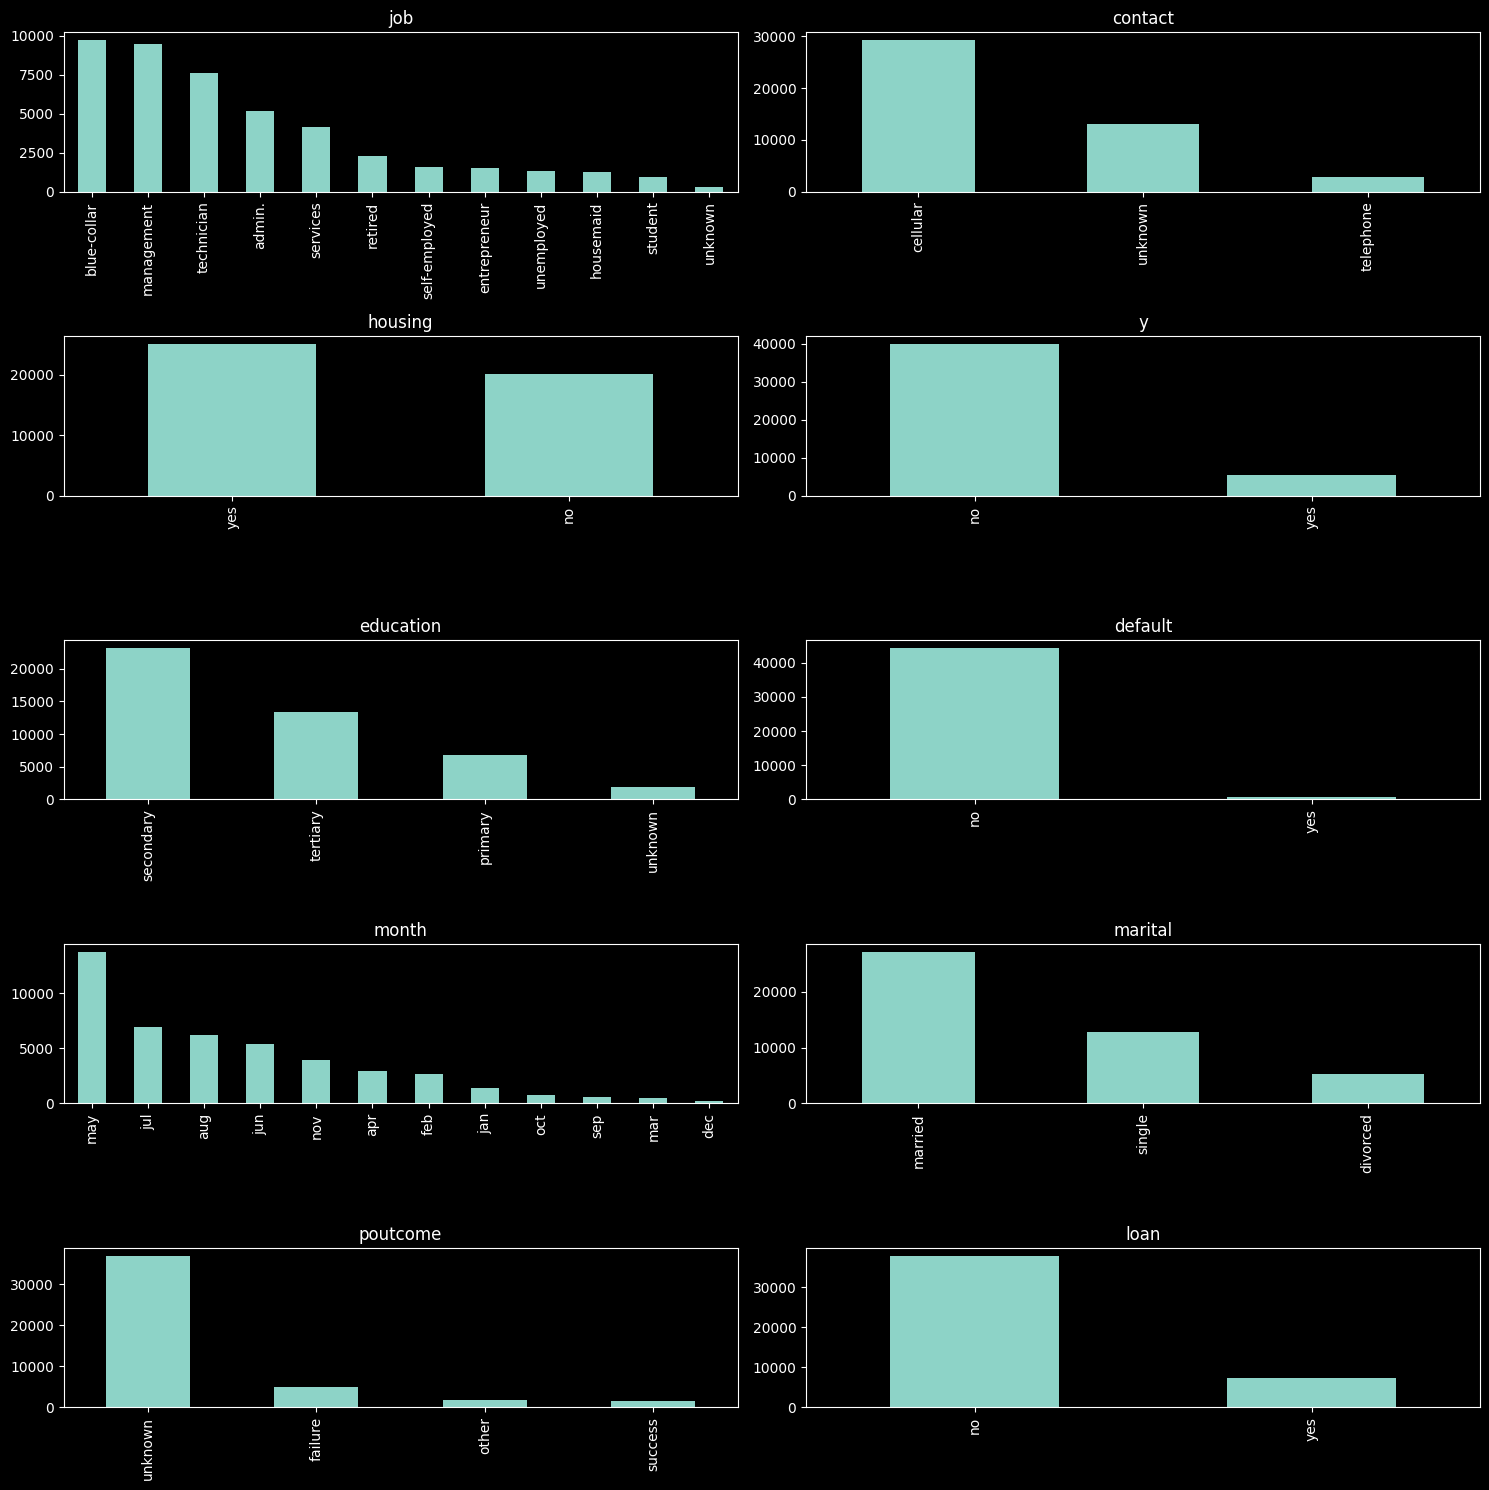

In [103]:
fig, ax = plt.subplots(5, 2, figsize=(15, 15))

fig.tight_layout(pad=5.0)

for var_name, ax_i in zip(categorical_var_names, ax.flatten()):
    df.get(var_name).value_counts().plot.bar(ax=ax_i)
    ax_i.set_title(var_name)
    
plt.savefig('categorical_vars_dist.png')

#### Plotting categorical variables densities

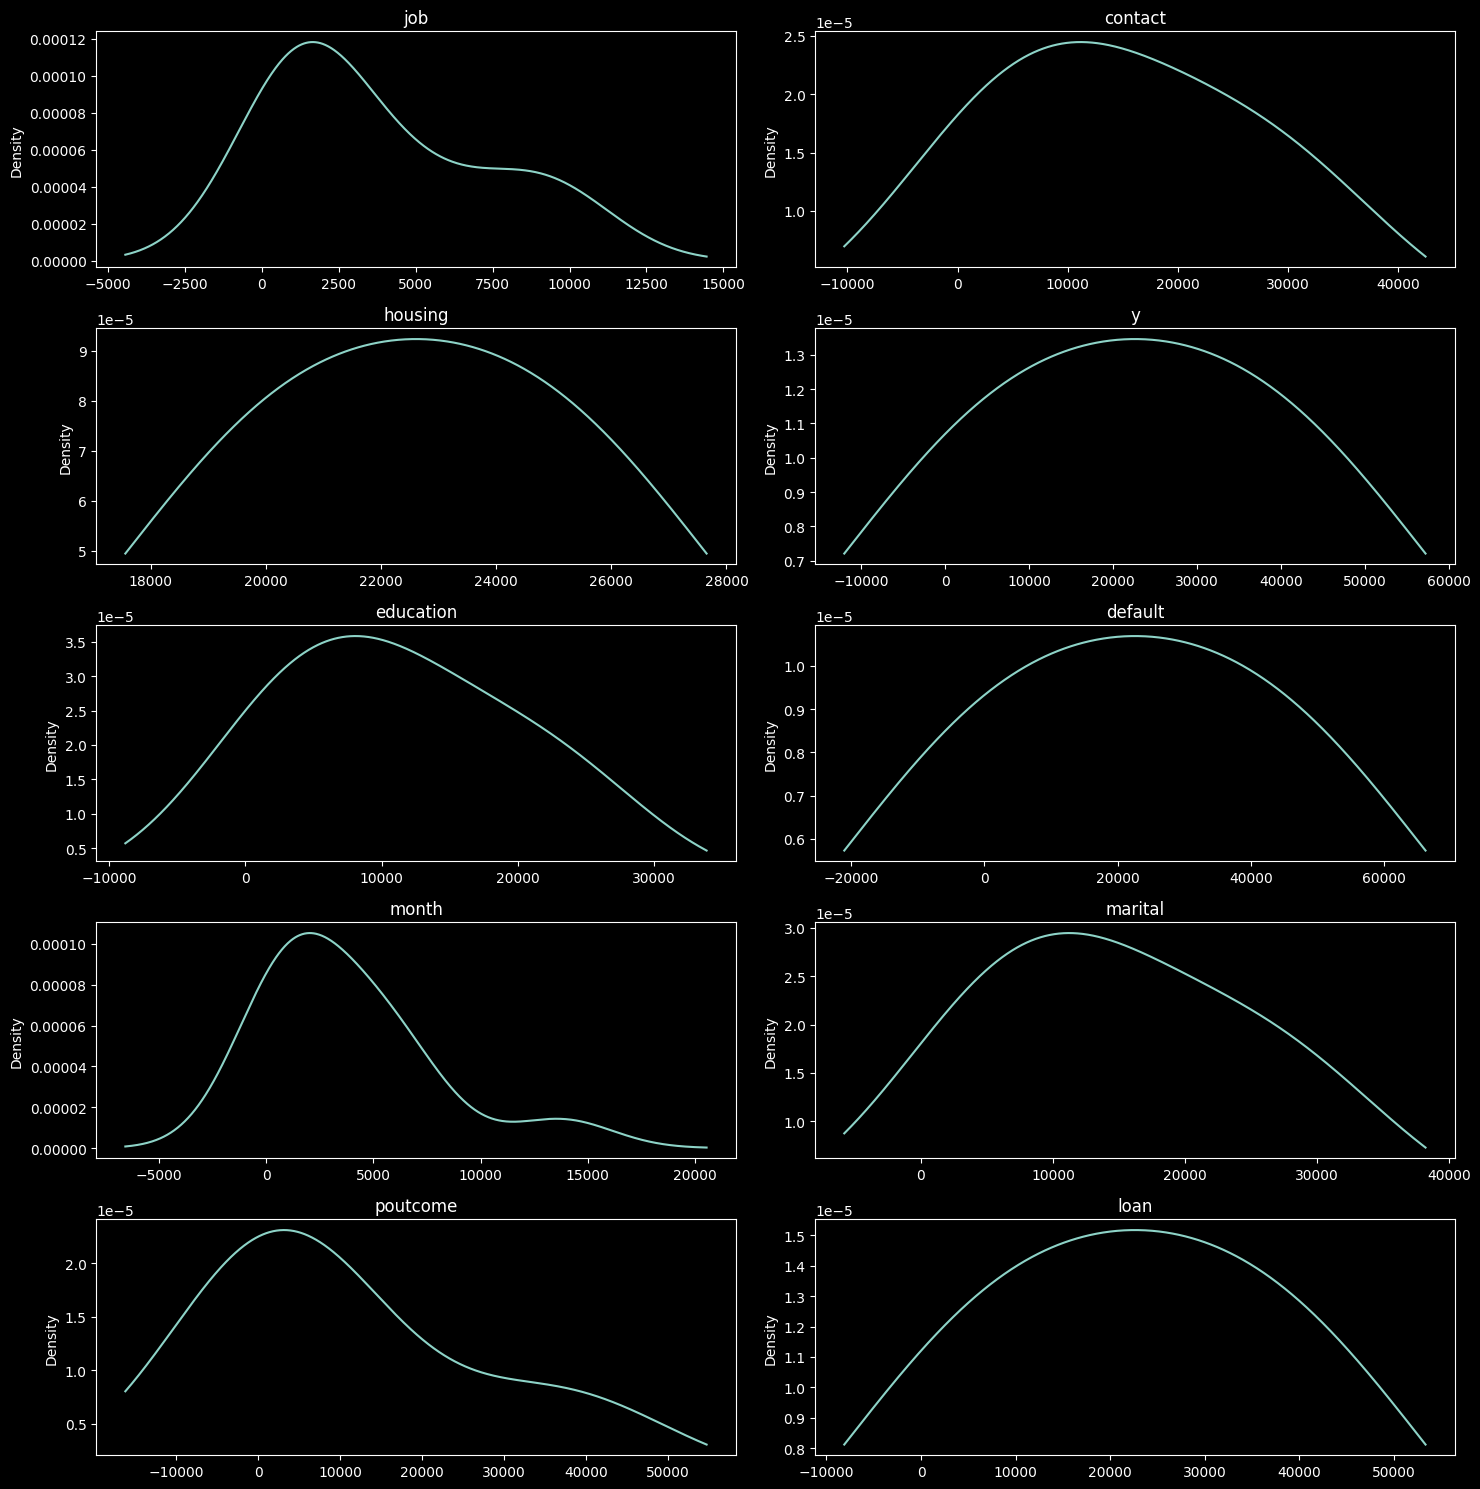

In [104]:
fig, ax = plt.subplots(5, 2, figsize=(15, 15))

fig.tight_layout(pad=5.0)

for var_name, ax_i in zip(categorical_var_names, ax.flatten()):
    df.get(var_name).value_counts().plot.density(ax=ax_i)
    ax_i.set_title(var_name)

In [105]:
numeric_var_names = df.select_dtypes(include=np.number).columns
numeric_var_names

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

#### Plotting numeric variable's densities

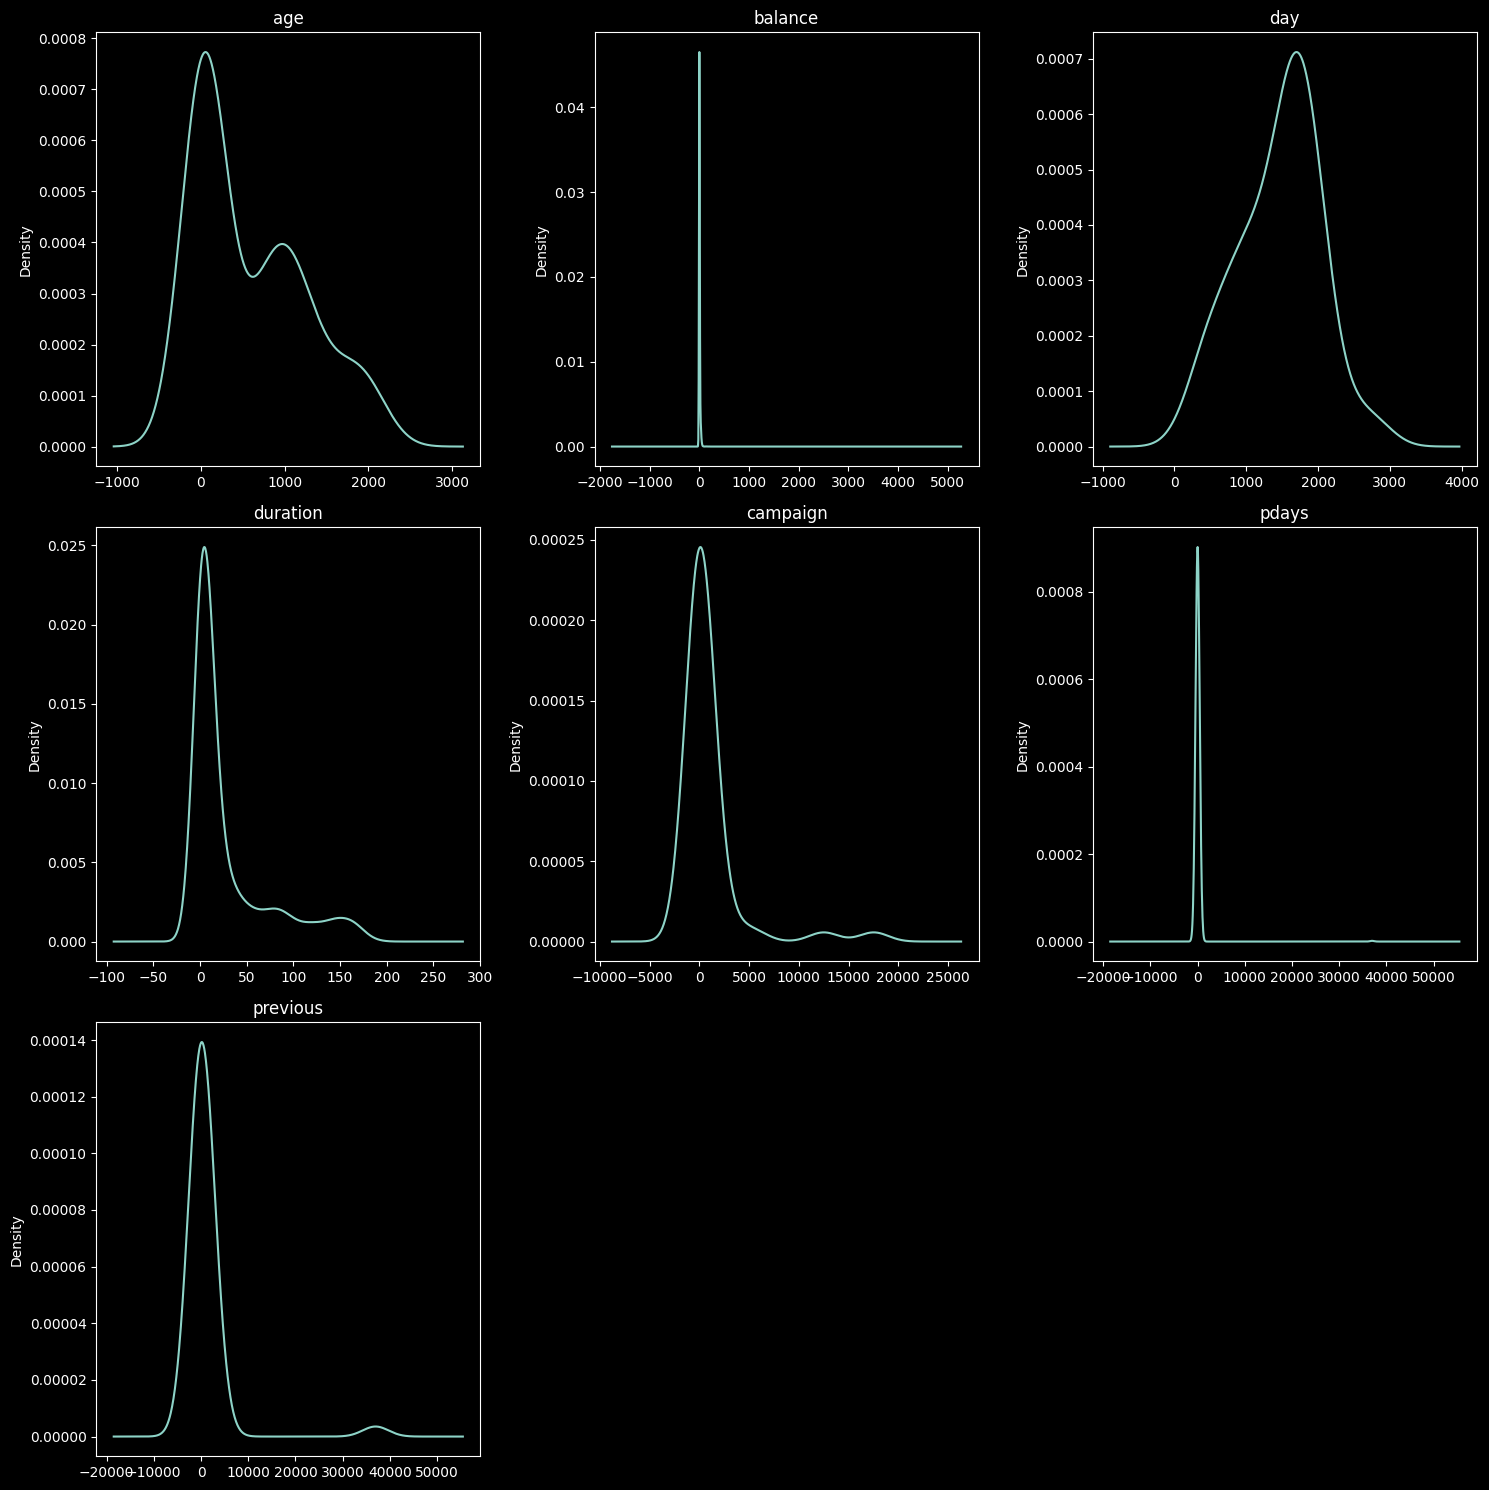

In [106]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
plt.subplots_adjust(bottom=0.01, wspace=0.5)

fig.tight_layout(pad=5)

for var_name, ax_i in zip(numeric_var_names, ax.flatten()):
    df.get(var_name).value_counts().plot.density(ax=ax_i)
    ax_i.set_title(var_name)

fig.delaxes(ax[2][1]); fig.delaxes(ax[2][2])

#### Target's pie chart

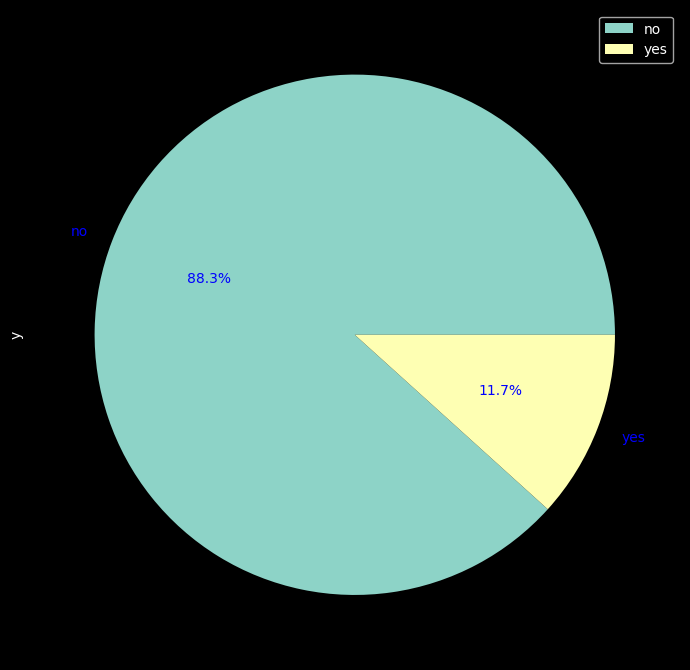

In [108]:
_, ax = plt.subplots(1,1, figsize=(7,7))

df.y.value_counts(sort=True).plot.pie(legend=True,autopct='%1.1f%%', textprops={'color':'b'}, ax=ax)
plt.savefig('target_var_pie.png')
plt.show()

### Checking for outliers within the data-frame

In [109]:
df[numeric_var_names].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [110]:
# converting duration from seconds to minutes to get a clearer view
df['duration'] = df['duration'].apply(lambda duration : duration / 60.0)
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,4.302718,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,4.292130,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,1.716667,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,3.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,5.316667,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,81.966667,63.000000,871.000000,275.000000


#### Using boxplots to visualize the outliers

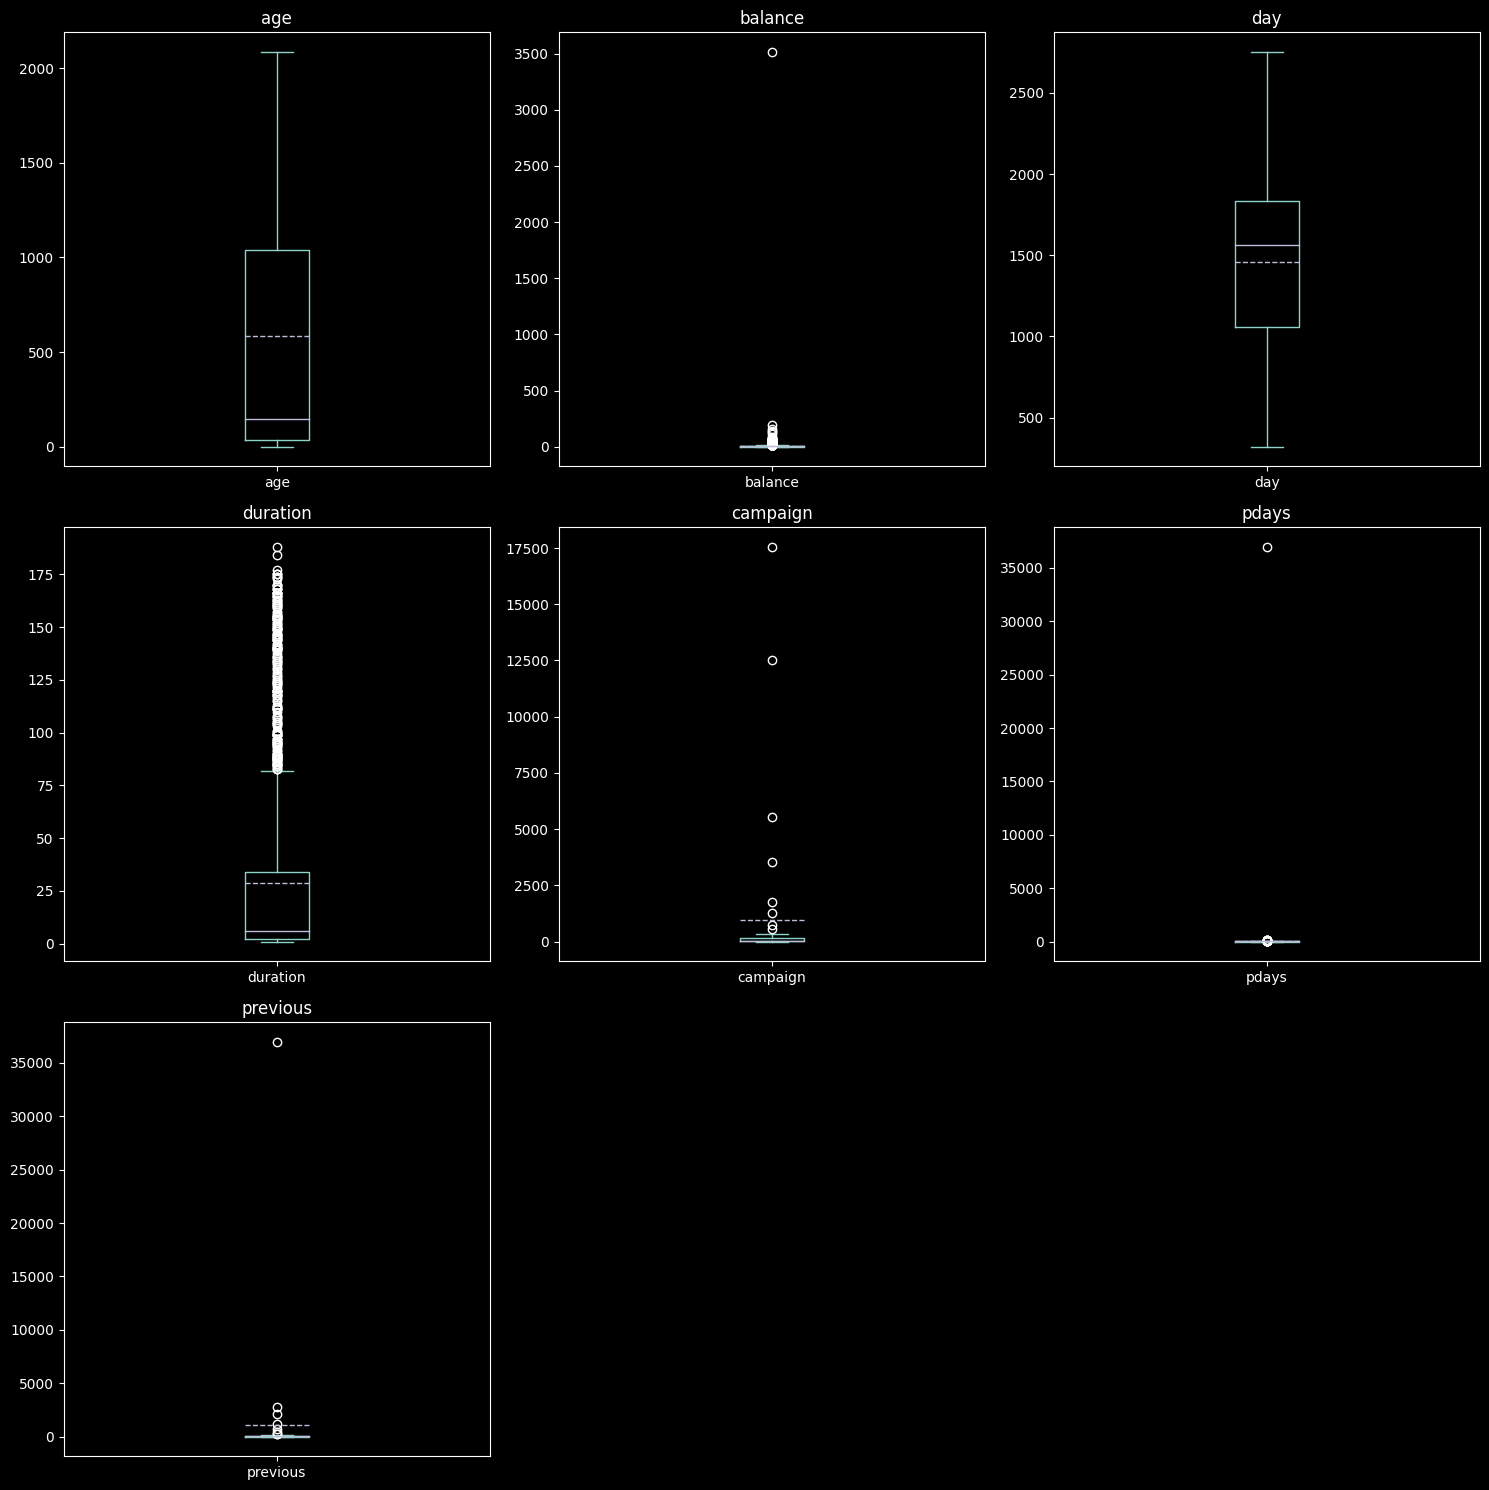

In [111]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
plt.subplots_adjust(bottom=0.01, wspace=0.5)

fig.tight_layout(pad=5)
plt.rcParams["figure.autolayout"] = True

for var_name, ax_i in zip(numeric_var_names, ax.flatten()):
    df.get(var_name).value_counts().plot.box(meanline=True, showmeans=True, showcaps=True, showbox=True, showfliers=True, ax=ax_i,)
    ax_i.set_title(var_name)

fig.delaxes(ax[2][1]); fig.delaxes(ax[2][2])

#### age and day have no outliers, but the rest of the numeric variables do. For example campaign (number of contacts performed during this campaign and for this client) do

#### I'll cap the outliers. For the upper limit, i'll use the mean plus x * standard deviations. For the lower limit, the mean minus x * standard deviations

In [112]:
def cap_outliers(var_name, multiplier, df):
    upper_lim = df[var_name].mean() + multiplier * df[var_name].std()
    lower_lim = df[var_name].mean() - multiplier * df[var_name].std()
    
    df[var_name] = np.where(
        df[var_name] > upper_lim,
        upper_lim,
        np.where(
            df[var_name] < lower_lim,
            lower_lim,
            df[var_name]
        )
        )
    return upper_lim, lower_lim

In [113]:
df_cpy = df.copy()
for var_name in ['campaign', 'duration', 'balance', 'previous', 'pdays']:
    cap_outliers(var_name, 1, df_cpy)

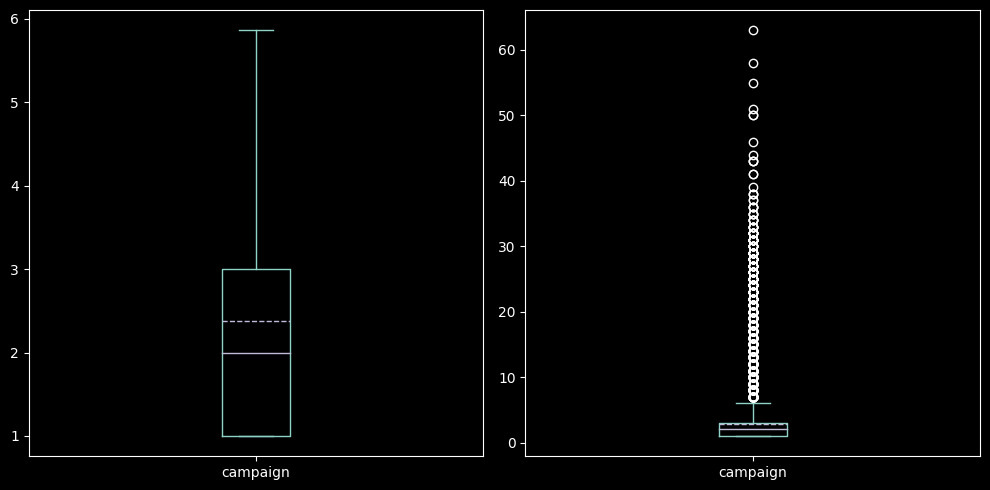

In [116]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))

var_name = 'campaign'

df_cpy[var_name].plot.box(meanline=True, showmeans=True, showcaps=True, showbox=True, showfliers=True, ax=ax.flatten()[0])
df[var_name].plot.box(meanline=True, showmeans=True, showcaps=True, showbox=True, showfliers=True, ax=ax.flatten()[1])

plt.savefig('cap_outliers.png')

In [120]:
df[['campaign', 'duration', 'balance', 'previous', 'pdays']].describe()

,campaign,duration,balance,previous,pdays
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,2.378921,3.723593,1017.910579,0.370004,22.390079
std,1.570351,2.542834,1370.128564,0.855736,50.852110
min,1.000000,0.010588,-1682.493771,0.000000,-1.000000
25%,1.000000,1.716667,72.000000,0.000000,-1.000000
50%,2.000000,3.000000,448.000000,0.000000,-1.000000
75%,3.000000,5.316667,1428.000000,0.000000,-1.000000
max,5.861862,8.594848,4407.037887,2.883764,140.326574


In [121]:
df_cpy[['campaign', 'duration', 'balance', 'previous', 'pdays']].describe()

,campaign,duration,balance,previous,pdays
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,2.378921,3.723593,1017.910579,0.370004,22.390079
std,1.570351,2.542834,1370.128564,0.855736,50.852110
min,1.000000,0.010588,-1682.493771,0.000000,-1.000000
25%,1.000000,1.716667,72.000000,0.000000,-1.000000
50%,2.000000,3.000000,448.000000,0.000000,-1.000000
75%,3.000000,5.316667,1428.000000,0.000000,-1.000000
max,5.861862,8.594848,4407.037887,2.883764,140.326574


In [122]:
df[['campaign', 'duration', 'balance', 'previous', 'pdays']] = df_cpy[['campaign', 'duration', 'balance', 'previous', 'pdays']]

### Moving to Data scaling. Since the variables don't follow normal distribution and have relatively small std, i'll go with MinMax scaler

In [123]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[numeric_var_names])
df[numeric_var_names] = scaled
df[numeric_var_names].head()

,age,balance,day,duration,campaign,pdays,previous
0,0.519481,0.628208,0.133333,0.505508,0.0,0.0,0.0
1,0.337662,0.281055,0.133333,0.291939,0.0,0.0,0.0
2,0.194805,0.276621,0.133333,0.146323,0.0,0.0,0.0
3,0.376623,0.523602,0.133333,0.177388,0.0,0.0,0.0
4,0.194805,0.276457,0.133333,0.383191,0.0,0.0,0.0


### Correlation/Covariance

In [126]:
df.corr(method='pearson')

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.120520,-0.009120,-0.013595,0.024087,-0.004570,0.006758
balance,0.120520,1.000000,0.011037,0.038981,-0.024559,0.050112,0.055231
day,-0.009120,0.011037,1.000000,-0.044599,0.152458,-0.084935,-0.080406
duration,-0.013595,0.038981,-0.044599,1.000000,-0.112749,0.020701,0.022556
campaign,0.024087,-0.024559,0.152458,-0.112749,1.000000,-0.107776,-0.084598
pdays,-0.004570,0.050112,-0.084935,0.020701,-0.107776,1.000000,0.884716
previous,0.006758,0.055231,-0.080406,0.022556,-0.084598,0.884716,1.000000


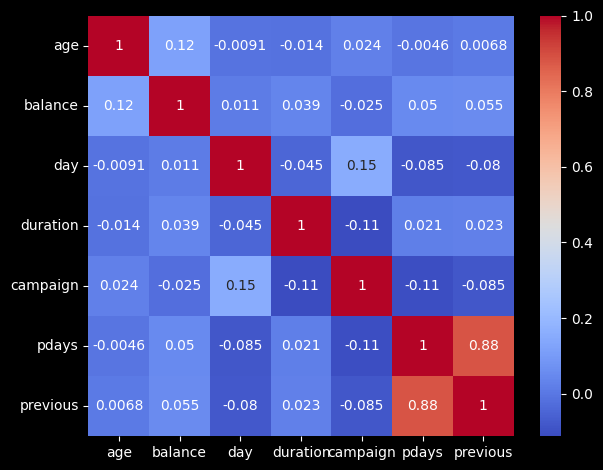

In [128]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.savefig('corr_numeric.png')

##### Creating all crosstabs between categorical variables to find their correlation with y

In [129]:
crosstabs = [ pd.crosstab(index=df.get(var), columns=df.y, normalize='index').sort_values('yes', ascending=False) for var in categorical_var_names ]
len(crosstabs)

10

##### Correlation between categorical variables w.r.t y

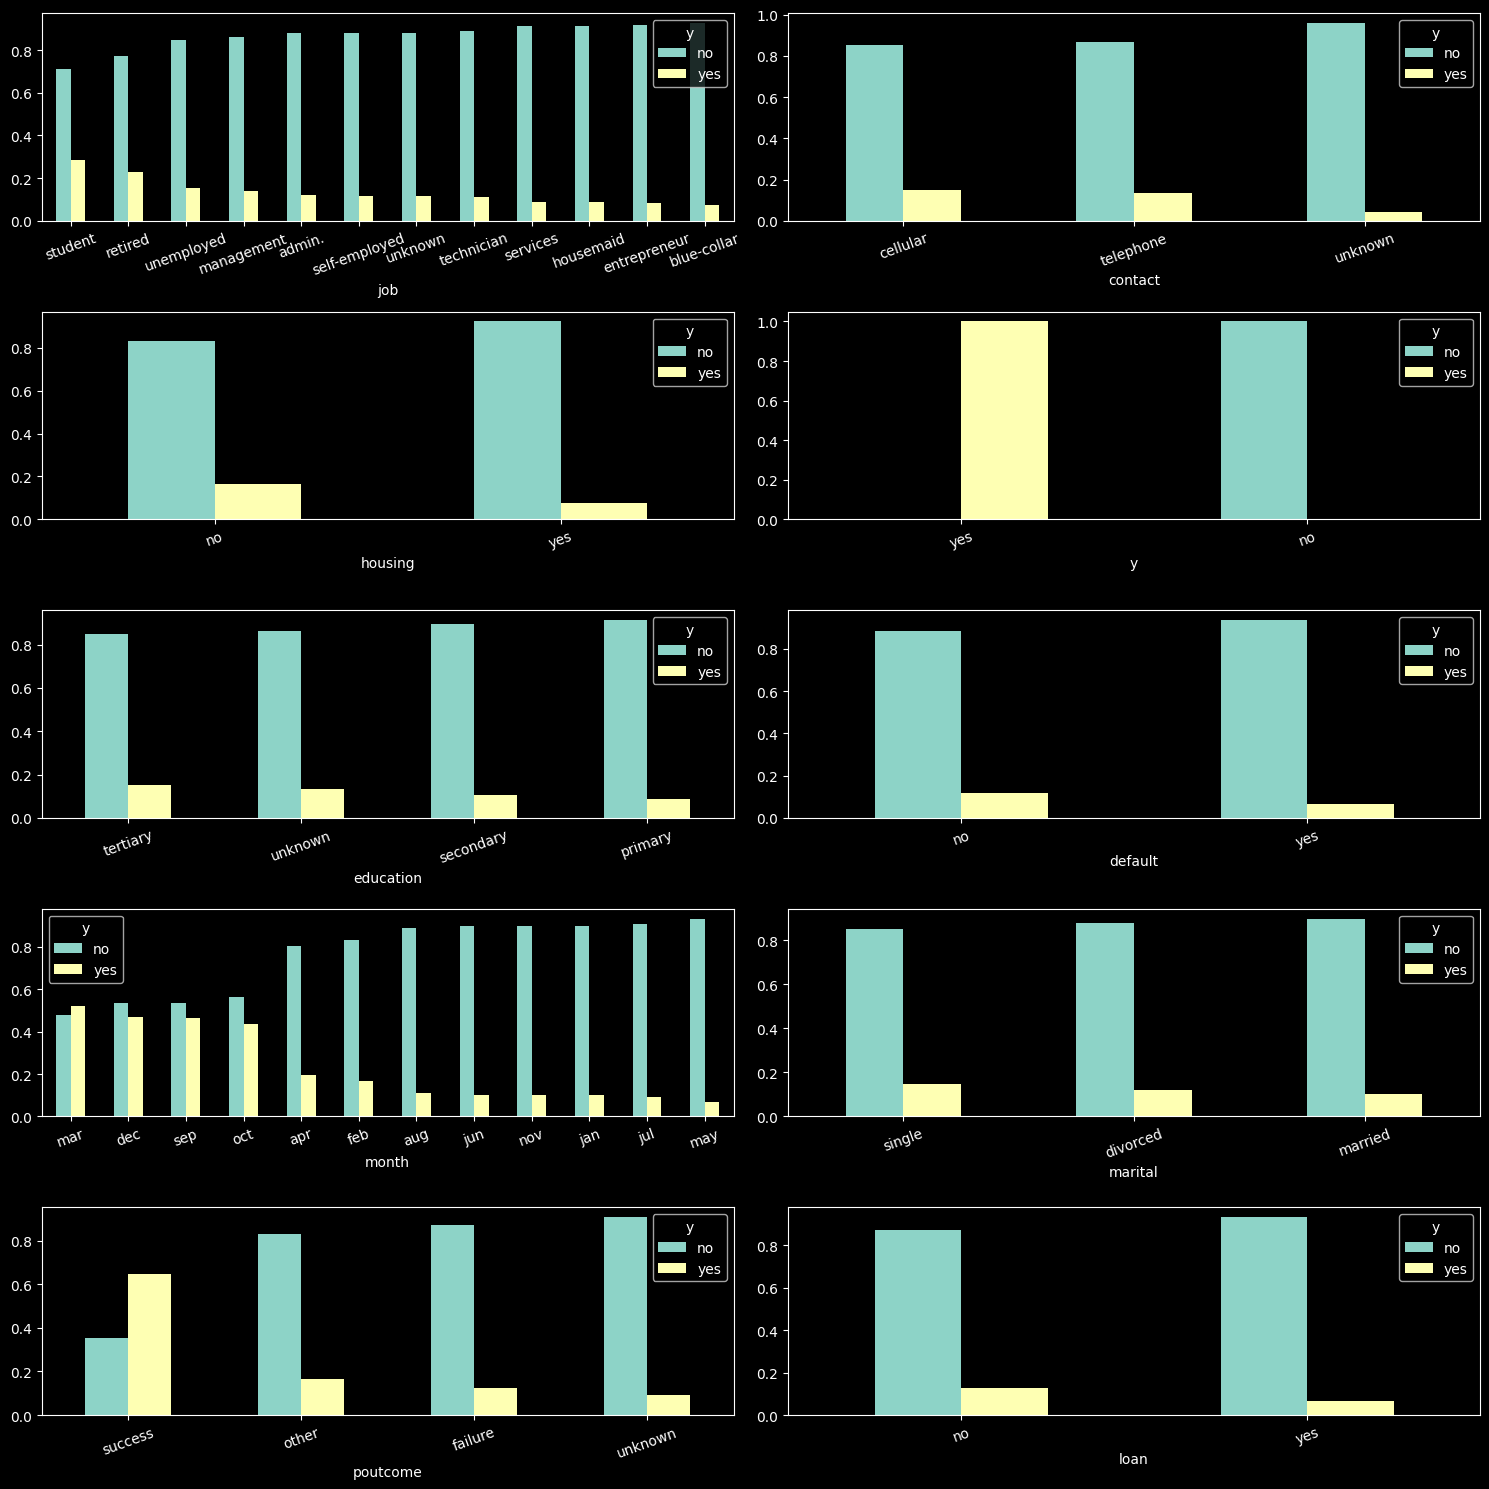

In [132]:
fig, ax = plt.subplots(5, 2, figsize=(15, 15), tight_layout=True)

plt.subplots_adjust(bottom=0.01, wspace=0.5)
fig.tight_layout(pad=5)

for crosstab, ax_i in zip(crosstabs, ax.flatten()):
    crosstab.plot.bar(ax=ax_i, rot=20)

plt.savefig('corr_cat_wrt_y.png')

##### I observed the following:
- ##### If poutcome was successful then it's more likely for y to be yes
- ##### The higher the education education level, the more likely it is to subscribe to a term deposit
- ##### People that are retired or students tend to subscribe to a term deposit.
- ##### It seems that march is the most succesful month
- ##### Type of contact doesn't seem to play any significant role w.r.t y
- ##### People without loans are more likely to get a deposit
- ##### Divorced and singles are more likely to get a deposit

##### Correlation between numeric variables w.r.t y

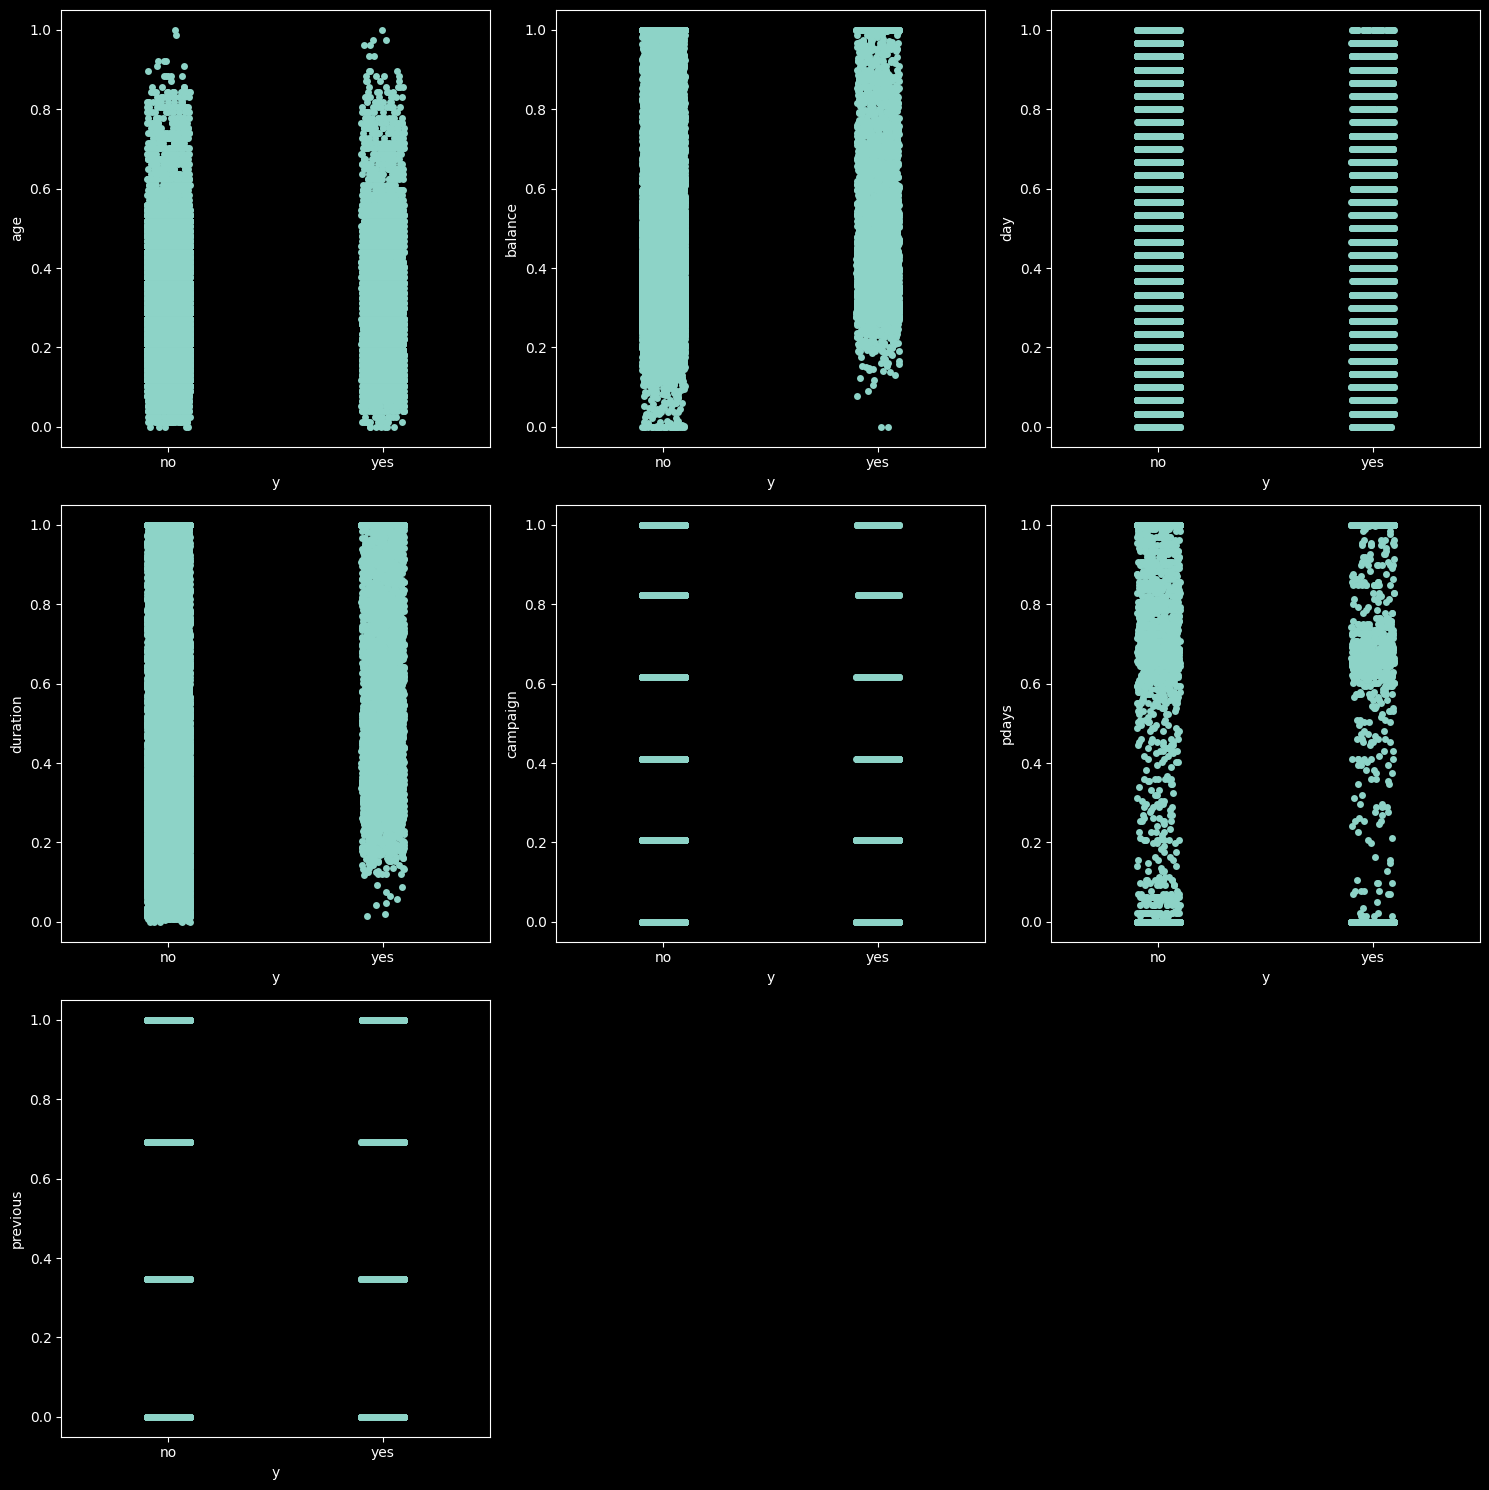

In [133]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
plt.subplots_adjust(bottom=0.01, wspace=0.5)
fig.tight_layout(pad=5)


for var_name, ax_i in zip(numeric_var_names, ax.flatten()):
    sns.stripplot(data=df, x=df.y, y=df.get(var_name), ax=ax_i)
    
fig.delaxes(ax[2][1]); fig.delaxes(ax[2][2])

##### I'll create numeric versions of the categorical features to find further correletion

In [134]:
cat_vars_as_nums_df = pd.DataFrame(df[categorical_var_names])

for var_name in categorical_var_names:
    codes, _ = pd.factorize(df[var_name])
    cat_vars_as_nums_df[var_name] = codes

for var_name in categorical_var_names:
    print(f'{var_name}, unique valus -> {cat_vars_as_nums_df[var_name].unique()}')
    
cat_vars_as_nums_df.head()

job, unique valus -> [ 0  1  2  3  4  5  6  7  8  9 10 11]
contact, unique valus -> [0 1 2]
housing, unique valus -> [0 1]
y, unique valus -> [0 1]
education, unique valus -> [0 1 2 3]
default, unique valus -> [0 1]
month, unique valus -> [ 0  1  2  3  4  5  6  7  8  9 10 11]
marital, unique valus -> [0 1 2]
poutcome, unique valus -> [0 1 2 3]
loan, unique valus -> [0 1]


,job,contact,housing,y,education,default,month,marital,poutcome,loan
0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0
2,2,0,0,0,1,0,0,0,0,1
3,3,0,0,0,2,0,0,0,0,0
4,4,0,1,0,2,0,0,1,0,0


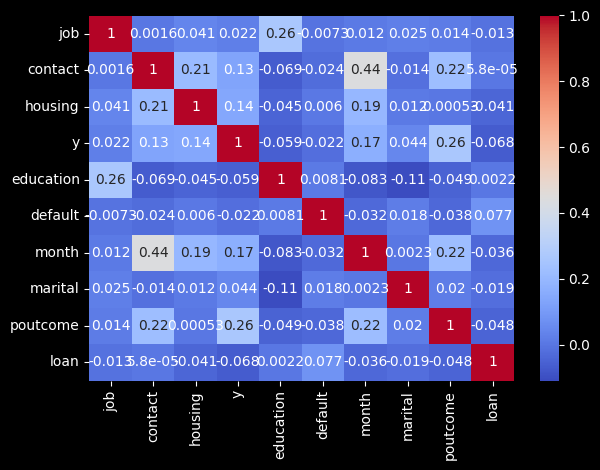

In [136]:
sns.heatmap(cat_vars_as_nums_df.corr(), cmap='coolwarm', annot=True)
plt.savefig('corr_cat.png')

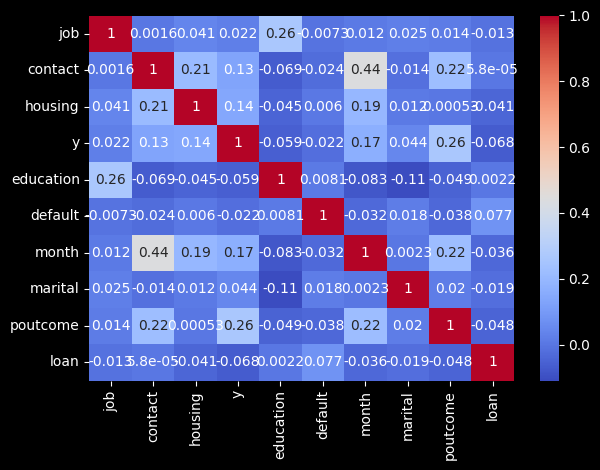

In [137]:
tmp_df = pd.concat([cat_vars_as_nums_df, df[numeric_var_names]])
sns.heatmap(cat_vars_as_nums_df.corr(), cmap='coolwarm', annot=True)
plt.savefig('corr_cat_numeric.png')

In [138]:
df.cov()

,age,balance,day,duration,campaign,pdays,previous
age,0.019018,0.003740,-0.000349,-0.000555,0.001073,-0.000227,0.000277
balance,0.003740,0.050624,0.000689,0.002598,-0.001785,0.004057,0.003688
day,-0.000349,0.000689,0.076960,-0.003665,0.013661,-0.008478,-0.006619
duration,-0.000555,0.002598,-0.003665,0.087747,-0.010787,0.002206,0.001983
campaign,0.001073,-0.001785,0.013661,-0.010787,0.104325,-0.012526,-0.008108
pdays,-0.000227,0.004057,-0.008478,0.002206,-0.012526,0.129470,0.094465
previous,0.000277,0.003688,-0.006619,0.001983,-0.008108,0.094465,0.088056


### Dealing with unknown/other values

In [42]:
for var in vars_with_unknown:
    print(f'{var} -> unknown: {df.loc[df[var] == "unknown"].shape[0] / df.shape[0] * 100}%')

print(f'poutcome -> other: {df.loc[df.poutcome == "other"].shape[0] / df.shape[0] * 100}%')

job -> unknown: 0.6370131162770122%
contact -> unknown: 28.798301298356595%
education -> unknown: 4.1074074893278185%
poutcome -> unknown: 81.74780473778506%
poutcome -> other: 4.06980602065869%


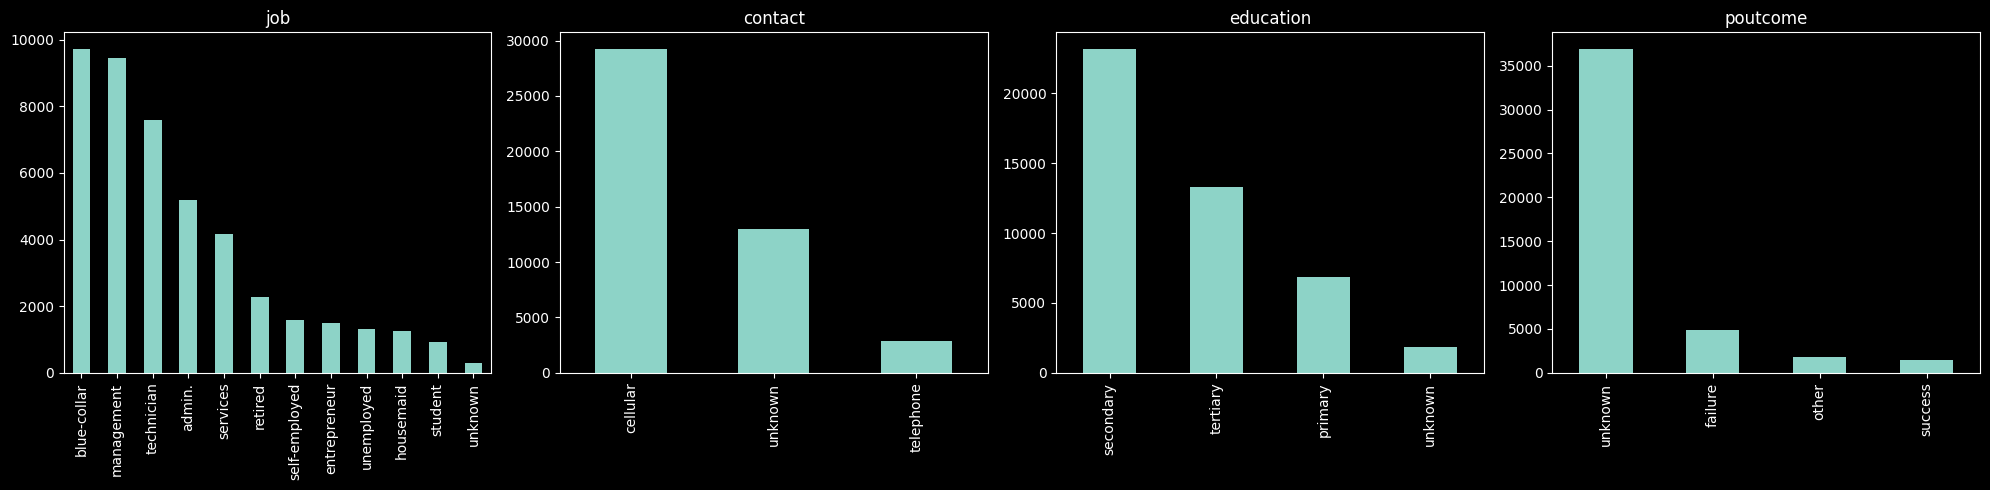

In [43]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for var_name, ax_i in zip(vars_with_unknown, ax.flatten()):
    df.get(var_name).value_counts().plot.bar(ax=ax_i, rot=90)
    ax_i.set_title(var_name)

##### For education i'll remove the unknown

In [139]:
df = df[df.education != 'unknown']
len(df.loc[df.education == 'unknown'])

0

##### For job the percentage of unknown values is 0.6% so it's safe to simply replace them with the mode

<AxesSubplot:xlabel='job'>

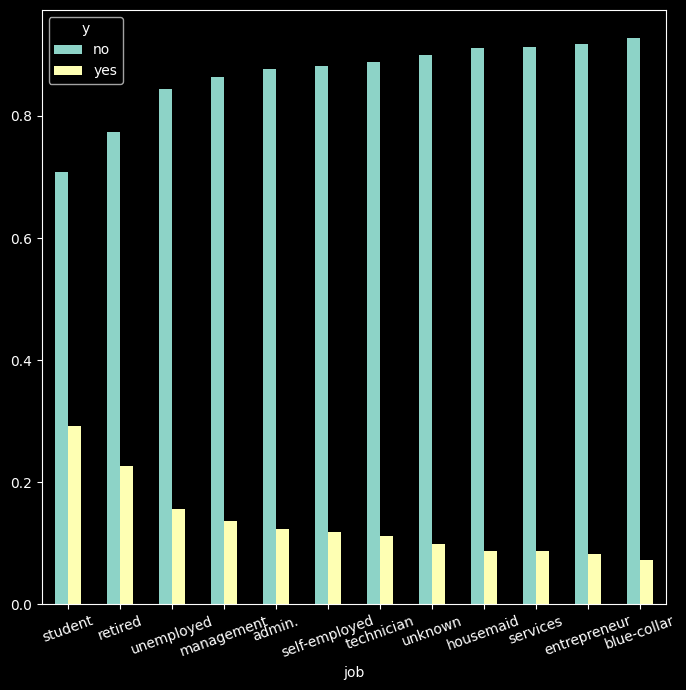

In [140]:
crosstab = pd.crosstab(index=df.job, columns=df.y, normalize='index').sort_values('yes', ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

crosstab.plot.bar(ax=ax, rot=20)

In [141]:
df.loc[df['job'] == 'unknown', 'job'] = df['job'].mode()[0]
df.job.value_counts()

blue-collar      9439
management       9216
technician       7355
admin.           5000
services         4004
retired          2145
self-employed    1540
entrepreneur     1411
unemployed       1274
housemaid        1195
student           775
Name: job, dtype: int64

##### For contact i'll find some correlated features and predict the unknown values

In [142]:
sub_df = pd.DataFrame(df.loc[df['contact'] != 'unknown'])

crosstabs = [ (pd.crosstab(index=sub_df[var_name], columns=sub_df['contact']), var_name) for var_name in categorical_var_names]

from scipy.stats import chi2_contingency

print(sorted([ (chi2_contingency(crosstab[0])[1], crosstab[1]) for crosstab in crosstabs ])[1:5])

# converting contact to numeric to find correletion between the numeric vars
contact_numeric_labels, contact_str_labels = pd.factorize(sub_df['contact'])

sub_df['contact_label'] = contact_numeric_labels

sorted([(abs(sub_df.get(var).corr(sub_df.contact_label)), var) for var in sub_df.select_dtypes(include=np.number).columns], reverse=True)[1:4]

[(4.116667465303792e-121, 'job'), (1.0481059681306658e-100, 'education'), (1.1142963889454244e-85, 'month'), (9.261357506611925e-25, 'marital')]


[(0.1836693156077626, 'age'),
 (0.07799323603196336, 'campaign'),
 (0.056827620916251584, 'duration')]

##### Chi-square's returns seem misleading since we know from the correletion matrix that job, education and marital are not correlated with contact. Because of that i'll train 2 models to predict missing contact values, one with the vars suggested by chi-square and the other with vars from corr matrix

##### I'll use education, job, month and marital and age to predict the unknown values in contact with Logistic Regression (the high correletion suggested from the chi square test could be misleading because of the number of samples between classes in the chi square table internally, but it should be good enough to use for predictions)

In [143]:
# first we must convert the categorical vars to numeric
inputs, inputs_v2, target = ['education', 'job', 'month', 'marital', 'age'], ['month', 'poutcome', 'housing', 'y', 'age'], 'contact_label'

for var in inputs[:-1]:
    labels, _ = pd.factorize(sub_df[var])
    sub_df[var] = labels

for var in inputs_v2[:-1]:
    labels, _ = pd.factorize(sub_df[var])
    sub_df[var] = labels

print(sub_df.contact_label.value_counts())
sub_df[inputs].head(), sub_df[inputs_v2].head()

0    28295
1     2716
Name: contact_label, dtype: int64


(       education  job  month  marital       age
 12657          0    0      0        0  0.116883
 12658          1    1      0        1  0.467532
 12659          0    1      0        1  0.324675
 12660          0    2      0        0  0.168831
 12661          0    2      0        0  0.116883,
        month  poutcome  housing  y       age
 12657      0         0        0  0  0.116883
 12658      0         0        0  0  0.467532
 12659      0         0        0  0  0.324675
 12660      0         0        0  0  0.168831
 12661      0         0        1  0  0.116883)

##### Because there is very high imbalance between number of observations between classes i'll up-sample the minority class (1)

In [144]:
from sklearn.utils import resample

sub_df_majority = sub_df[sub_df.contact_label == 0]
sub_df_minority = sub_df[sub_df.contact_label == 1]

sub_df_minority_upsampled = resample(
    sub_df_minority, 
    replace=True, 
    n_samples=len(sub_df_majority),
    random_state=123
)

sub_df_upsampled = pd.concat([sub_df_majority, sub_df_minority_upsampled])

sub_df_upsampled.contact_label.value_counts()

0    28295
1    28295
Name: contact_label, dtype: int64

##### Now i think i can safely make predictions since the number of observations between classes is equal

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = sub_df_upsampled[inputs].values
X_v2 = sub_df_upsampled[inputs_v2].values
y = sub_df_upsampled[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2, y, test_size=0.25, random_state=16)

log_reg, log_reg_v2 = LogisticRegression(), LogisticRegression()

log_reg.fit(X_train, y_train)
log_reg_v2.fit(X_train_v2, y_train_v2)

y_pred = log_reg.predict(X_test)
y_pred_v2 = log_reg_v2.predict(X_test_v2)

##### Visualizing effectiveness of the models using confusion matrix

Text(0.5, 9.444444444444445, 'Predicted label')

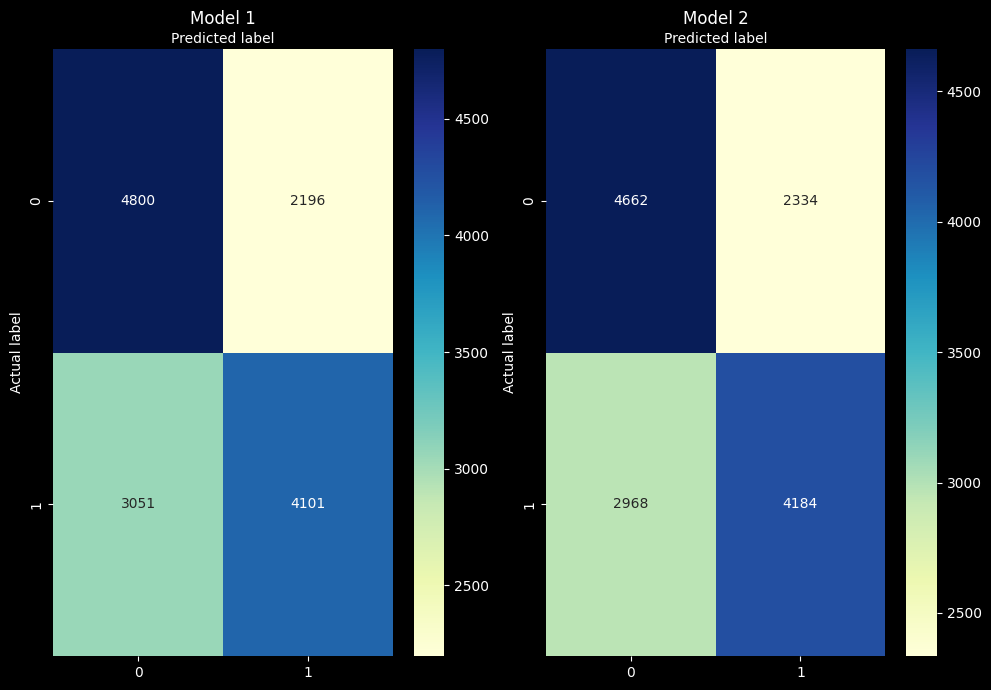

In [146]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix_v2 = metrics.confusion_matrix(y_test_v2, y_pred_v2)

fig, ax = plt.subplots(1, 2, figsize=(10, 7), tight_layout=True)
class_names = [0, 1]
tick_marks = np.arange(len(class_names))

ax[0].set_title('Model 1')
ax[0].set_xticks(tick_marks, class_names)
ax[0].set_yticks(tick_marks, class_names)

ax[1].set_title('Model 2')
ax[1].set_xticks(tick_marks, class_names)
ax[1].set_yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', ax=ax[0])

ax[0].xaxis.set_label_position("top")
ax[0].set_ylabel('Actual label')
ax[0].set_xlabel('Predicted label')

sns.heatmap(pd.DataFrame(cnf_matrix_v2), annot=True, cmap="YlGnBu" ,fmt='g', ax=ax[1])

ax[1].xaxis.set_label_position("top")
ax[1].set_ylabel('Actual label')
ax[1].set_xlabel('Predicted label')

In [147]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=list(contact_str_labels)))

              precision    recall  f1-score   support

    cellular       0.61      0.69      0.65      6996
   telephone       0.65      0.57      0.61      7152

    accuracy                           0.63     14148
   macro avg       0.63      0.63      0.63     14148
weighted avg       0.63      0.63      0.63     14148



In [148]:
print(classification_report(y_test_v2, y_pred_v2, target_names=list(contact_str_labels)))

              precision    recall  f1-score   support

    cellular       0.61      0.67      0.64      6996
   telephone       0.64      0.59      0.61      7152

    accuracy                           0.63     14148
   macro avg       0.63      0.63      0.62     14148
weighted avg       0.63      0.63      0.62     14148



##### It seems both models are about the same so i'll use the first one for predictions

##### Replacing the unknowns of contact with the predictions

cellular     35734
telephone     7620
Name: contact, dtype: int64


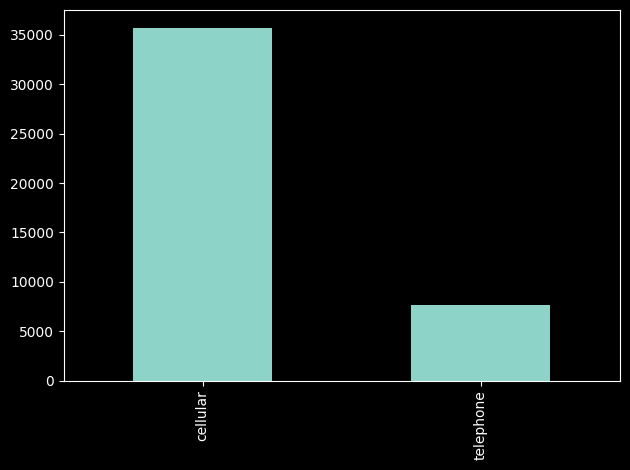

In [151]:
mask = ~(df['contact'] == 'unknown')
sub_df = pd.DataFrame(df.loc[mask, inputs])

for var in inputs[:-1]:
    labels, _ = pd.factorize(sub_df[var])
    sub_df[var] = labels

X = sub_df[inputs].values
contact_pred = log_reg.predict(X)

predicted_str_labels = [contact_str_labels[i] for i in contact_pred]

for idx, new_value in zip(df.loc[df['contact'] == 'unknown'].index, predicted_str_labels):
    df.at[idx, 'contact'] = new_value

print(df.contact.value_counts())
df.contact.value_counts().plot.bar()
plt.savefig('contact_pred_res.png')

##### Applying the same strategy for poutcome

In [152]:
# finding features that have good correlation with poutcome

sub_df = pd.DataFrame(df.loc[(df['poutcome'] != 'unknown') & (df['poutcome'] != 'other')])
print(sub_df.poutcome.value_counts())

crosstabs = [ (pd.crosstab(index=sub_df[var], columns=sub_df['poutcome']), var) for var in categorical_var_names]

from scipy.stats import chi2_contingency

print(sorted([ (chi2_contingency(crosstab[0])[1], crosstab[1]) for crosstab in crosstabs ])[1:5])

# converting poutcome to numeric to find correletion between the numeric vars
poutcome_numeric_labels, poutcome_str_labels = pd.factorize(sub_df['poutcome'])

sub_df['poutcome_label'] = poutcome_numeric_labels

sorted([(abs(sub_df.get(var).corr(sub_df.poutcome_label)), var) for var in sub_df.select_dtypes(include=np.number).columns], reverse=True)[1:4]

failure    4724
success    1430
Name: poutcome, dtype: int64
[(0.0, 'y'), (3.174447741220795e-161, 'housing'), (1.6638276775506821e-153, 'month'), (6.751376468818299e-51, 'job')]


[(0.2675419340459492, 'pdays'),
 (0.17705456533949052, 'duration'),
 (0.08940967781037082, 'balance')]

In [153]:
sub_df['poutcome_label'].value_counts()

0    4724
1    1430
Name: poutcome_label, dtype: int64

In [154]:
inputs, target = ['y', 'housing', 'month', 'loan', 'pdays'], 'poutcome_label'

for var in inputs[:-1]:
    labels, _ = pd.factorize(sub_df[var])
    sub_df[var] = labels

print(f'Before sampling: {sub_df.poutcome_label.value_counts()}')

sub_df_majority = sub_df[sub_df.poutcome_label == 0]
sub_df_minority = sub_df[sub_df.poutcome_label == 1]

sub_df_minority_upsampled = resample(
    sub_df_minority, 
    replace=True, 
    n_samples=len(sub_df_majority),
    random_state=123
)

sub_df_upsampled = pd.concat([sub_df_majority, sub_df_minority_upsampled])

print(f'After sampling: {sub_df_upsampled.poutcome_label.value_counts()}')

X = sub_df_upsampled[inputs].values
y = sub_df_upsampled[target].values
print(f'{X.shape=}, {y.shape=}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
print(f'{X_train.shape=}, {y_train.shape=}')

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred, target_names=list(poutcome_str_labels)))

Before sampling: 0    4724
1    1430
Name: poutcome_label, dtype: int64
After sampling: 0    4724
1    4724
Name: poutcome_label, dtype: int64
X.shape=(9448, 5), y.shape=(9448,)
X_train.shape=(7086, 5), y_train.shape=(7086,)
              precision    recall  f1-score   support

     failure       0.77      0.83      0.80      1178
     success       0.82      0.75      0.78      1184

    accuracy                           0.79      2362
   macro avg       0.79      0.79      0.79      2362
weighted avg       0.79      0.79      0.79      2362



#### Run this cell 3 times (1 for 'other', 1 for 'unknown')

success    29610
failure    13744
Name: poutcome, dtype: int64


<AxesSubplot:>

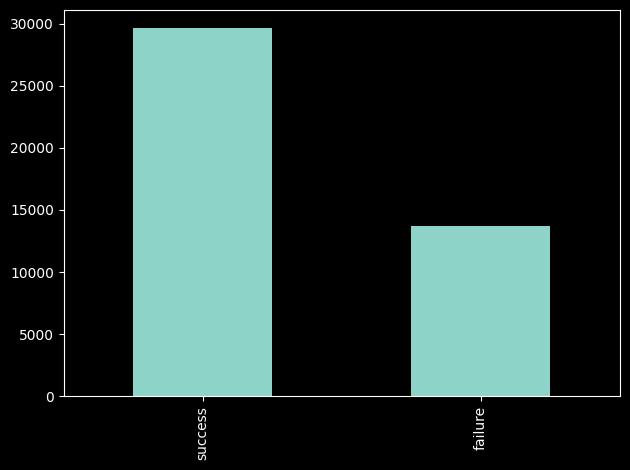

In [159]:
mask = ~((df['poutcome'] == 'unknown') | (df['poutcome'] == 'other'))
sub_df = pd.DataFrame(df.loc[mask, inputs])

for var in inputs[:-1]:
    labels, _ = pd.factorize(sub_df[var])
    sub_df[var] = labels

X = sub_df[inputs].values
poutcome_pred = log_reg.predict(X)

predicted_str_labels = [poutcome_str_labels[i] for i in poutcome_pred]

for idx, new_value in zip(df.loc[(df['poutcome'] == 'unknown') | (df['poutcome'] == 'other')].index, predicted_str_labels):
    df.at[idx, 'poutcome'] = new_value

print(df.poutcome.value_counts())
df.poutcome.value_counts().plot.bar()

## Now that i've dealt with data visualizations, correlation/coveriance, outliers, unknowns values and scaling i'll save the 'clean' dataset and use it to continue the assignment in bank_2.ipynb

In [160]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,management,married,tertiary,no,0.628208,yes,no,cellular,0.133333,may,0.505508,0.0,0.0,0.0,failure,no
1,0.337662,technician,single,secondary,no,0.281055,yes,no,telephone,0.133333,may,0.291939,0.0,0.0,0.0,success,no
2,0.194805,entrepreneur,married,secondary,no,0.276621,yes,yes,cellular,0.133333,may,0.146323,0.0,0.0,0.0,success,no
5,0.220779,management,married,tertiary,no,0.314227,yes,no,cellular,0.133333,may,0.268640,0.0,0.0,0.0,success,no
6,0.129870,management,single,tertiary,no,0.349697,yes,yes,cellular,0.133333,may,0.420080,0.0,0.0,0.0,failure,no


In [161]:
df.to_csv('bank_data_clean_v2.csv', index=False)

In [162]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64